# **O QUE SÃO CÓDIGOS DE BARRA ?**

Os códigos de barras são representações gráficas de dados numéricos ou alfanuméricos usadas para identificar produtos, documentos ou itens de forma rápida e automatizada. Eles consistem em uma sequência de barras e espaços de diferentes larguras, que podem ser lidos por scanners ópticos e convertidos em informações legíveis por computadores.

📌 Tipos de Códigos de Barras

Código de Barras 1D (Linear)

- Exemplo: EAN-13, UPC, Code 39, Code 128
    - Usado em produtos de supermercados, livros (ISBN), etiquetas de logística, etc.

Código de Barras 2D (Bidimensional)

- Exemplo: QR Code, Data Matrix, PDF417
    - Pode armazenar muito mais informações, incluindo links para sites, textos e até imagens.


No geral, Cada conjunto de barras e espaços representa um número ou letra. Quando um scanner lê o código, ele traduz essa sequência em um número ou conjunto de caracteres.

In [2]:
#Importações
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


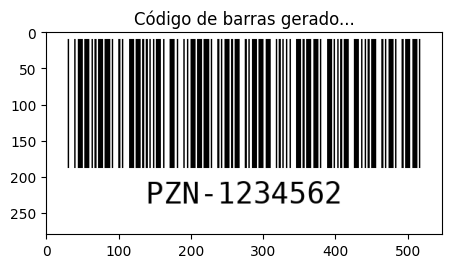

In [3]:
#GERANDO CÓDIGOS DE BARRA
"""
Os formatos suportados são:
- EAN-8 European Article Number ( 7 digitos e um digito verificador)
- EAN-13 European Article Number ( 12 digitos e um digito verificador)
- EAN-14 European Article Number
- UPC-A Universal Product Code
- JAN Japanese Article Number
- ISBN-10 Identificação de Livros e Publicações 10 digitos
- ISBN-13 Identificação de Livros e Publicações 13 digitos
- ISSN International Standard Serial Number
- Code 39  Um dos primeiros códigos alfanuméricos (suporta letras e números). Usado em identificação de produtos industriais, crachás, rastreamento de peças.
- Code 128 Código mais denso e eficiente do que o Code 39. Suporta todos os 128 caracteres ASCII.
- PZN Pharmazentralnummer (Código usado na indústria farmacêutica na Alemanha.)
"""

#pip install python-barcode

from barcode import EAN13, PZN
from barcode.writer import ImageWriter

with open('codigoDeBarra.png', 'wb') as f:
    PZN('1234567890102', writer = ImageWriter()).write(f)


barcode = cv2.imread('codigoDeBarra.png')
imshow('Código de barras gerado...',barcode)

# **GERANDO Quick Response Code (QRCode)**

Um QRCode (Quick Response Code) é um tipo de código de barras bidimensional que armazena informações, como texto, números, URLs, endereços de e-mail, entre outros. Ele é composto por uma matriz de pontos pretos e brancos dispostos em um quadrado, que são lidos por dispositivos móveis ou leitores de código de barras.

Foi criado em 1994 para a industria automotiva no Japão. Na prática, os códigos QR geralmente contêm dados para um localizador, identificador ou rastreador que aponta para um site ou aplicativo. Um código QR usa quatro modos de codificação padronizados (numérico, alfanumérico, byte/binário e kanji) para armazenar dados com eficiência; Extensões também podem ser usadas.

Um código QR consiste em quadrados pretos dispostos em uma grade quadrada sobre um fundo branco, que pode ser lido por um dispositivo de imagem, como uma câmera, e processado usando correção de erros Reed-Solomon até que a imagem possa ser interpretada adequadamente.
Os dados necessários são então extraídos de padrões presentes nos componentes horizontais e verticais da imagem.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/QR_Code_Structure_Example_3.svg/800px-QR_Code_Structure_Example_3.svg.png)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


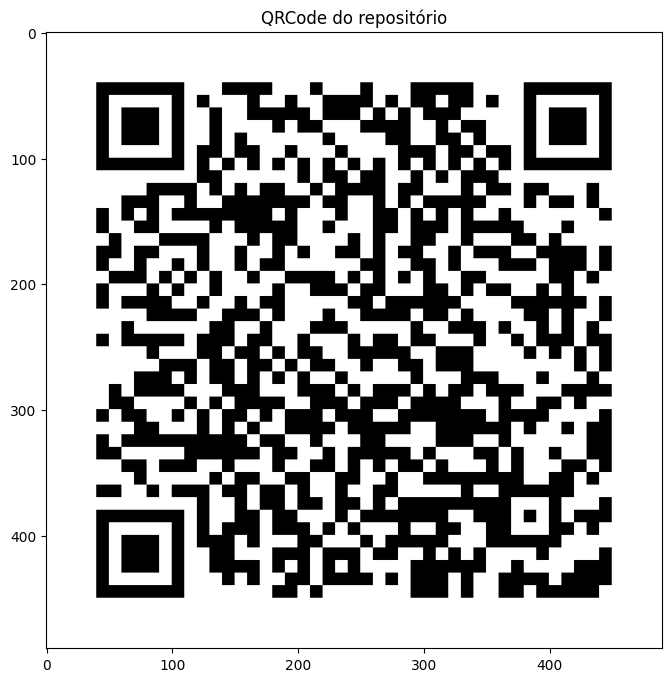

In [8]:
import qrcode
from PIL import Image
import qrcode.constants

""" 
No QRCode, existem quatro níveis de correção de erro, que são definidos pela especificação ISO/IEC 18004. Esses níveis são:

L (Low): 7% de correção de erro
M (Medium): 15% de correção de erro
Q (Quartile): 25% de correção de erro
H (High): 30% de correção de erro (Para aplicações críticas, ou seja, evitar ao máximo a perda de dados)
Cada nível de correção de erro adiciona mais informações de redundância ao QRCode, 
o que permite que o código seja lido mesmo se parte dele for danificada ou obscurecida.



"""

qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_H, box_size=10, border=4)

qr.add_data("https://github.com/GabrielFerrante/ClassicalCV")
qr.make(fit=True)
imagem = qr.make_image(fill_color='Black', back_color='White')
imagem.save('QRcode-Repositorio.png')

codigo = cv2.imread('QRcode-Repositorio.png')
print(codigo)
imshow("QRCode do repositório", codigo, size=8)


**DECODIFICANDO QR Codes**

In [15]:
from pyzbar.pyzbar import decode
from PIL import Image

imagem = Image.open('QRcode-Repositorio.png')
resultado = decode(imagem)

for i in resultado:
    print(i)
    print(i.data.decode('utf-8'))

Decoded(data=b'https://github.com/GabrielFerrante/ClassicalCV', type='QRCODE', rect=Rect(left=41, top=41, width=408, height=408), polygon=[Point(x=41, y=41), Point(x=41, y=448), Point(x=449, y=449), Point(x=448, y=41)], quality=1, orientation='UP')
https://github.com/GabrielFerrante/ClassicalCV


**DETECTANDO QR Codes**

[Point(x=41, y=41), Point(x=41, y=448), Point(x=449, y=449), Point(x=448, y=41)]
QR Code https://github.com/GabrielFerrante/ClassicalCV (QRCODE)


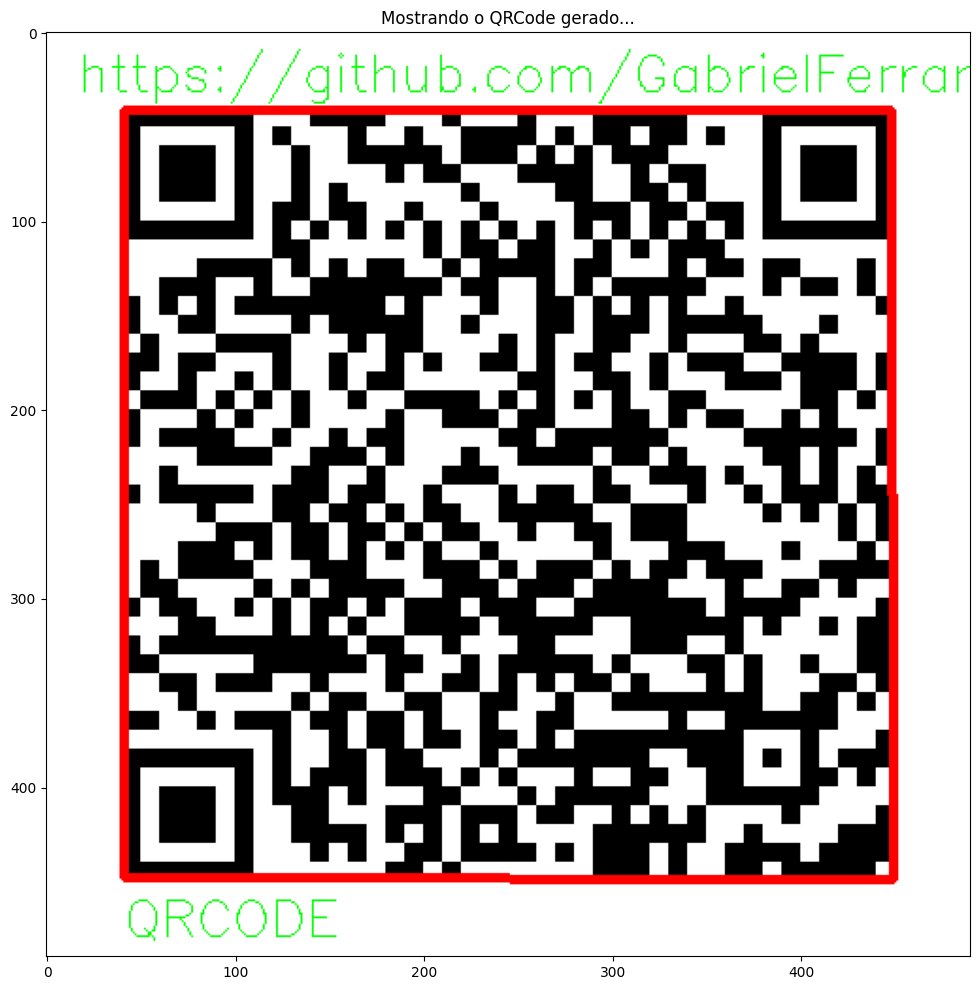

In [29]:
imagem = cv2.imread("QRcode-Repositorio.png")

codigos = decode(imagem)

for cod in codigos:
    (x, y, w, h) = cod.rect
    print(cod.polygon)

    ponto1, ponto2, ponto3, ponto4 = cod.polygon

    #desenhar o retangulo
    pontos = np.array([[ponto1.x, ponto1.y], [ponto2.x, ponto2.y], [ponto3.x, ponto3.y], [ponto4.x, ponto4.y]], np.int32)
    #pontos = pontos.reshape((-1,1,2))
    cv2.polylines(imagem, [pontos], True, (0,0,255), 3)

    #extrair a string e o tipo do objeto
    texto = cod.data.decode()
    tipo = cod.type

    texto = "{} ({})".format(texto, tipo)
    cv2.putText(imagem, texto, (x-25, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 1)
    cv2.putText(imagem, tipo, (x, y+h +30), cv2.FONT_HERSHEY_SIMPLEX, 0.9,  (0,255, 0), 1)
    print(f'QR Code {texto}')


imshow("Mostrando o QRCode gerado...", imagem, size=12)

**DECODIFICANDO Código de barras**

Código de barras detectado:  PZN-1234562 (CODE39)


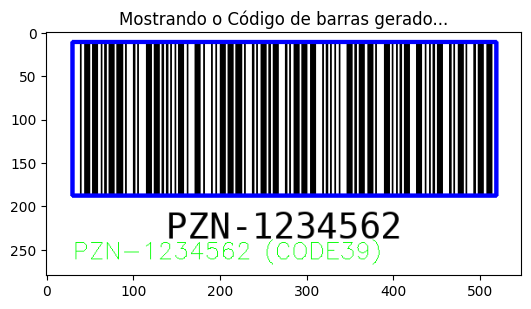

In [38]:
image = cv2.imread("codigoDeBarra.png")

codigos = decode(image)

for cod in codigos:
    (x, y, w, h) = cod.rect
    
    #desenhar o retangulo
    cv2.rectangle(image, (x,y),(x+w, y+h), (255,0,0), 3)

    #extrair a string e o tipo do objeto
    texto = cod.data.decode()
    tipo = cod.type

    texto = "{} ({})".format(texto, tipo)
    
    cv2.putText(image, texto, (x, y+250), cv2.FONT_HERSHEY_SIMPLEX, 0.9,  (0,255, 0), 1)
    print(f'Código de barras detectado:  {texto}')


imshow("Mostrando o Código de barras gerado...", image, size=12)